# Dactylology Machine Learning Multi Classifier
   * By Pedro Iniguez Huerta

### Description
   In this notebook I present a Machine learning Multi Classifier applied to dactylology images.

   This Machine Learning multi classifier is not limited to dactylology images classification and I have already used to classify and compare efficiency of machine learnig algorithms in several more datasets.

   Due to depending of the dataset and Hardware different machine algorithms can be perform better. This solution was created as an easy way to run multiples machine learning algorithms and plot results for easier comparison of different characteristics.

   This document contains at least the following machine learnig algoritms and 
   can contain much more by just updating the dictionary of machine learning instances.

* Extra Trees

* Random Forest

* Bagging Forest

* KNeighborsClassifier

* SVC

* DecisionTreeClassifier

* GaussianProcessClassifier

* MLPClassifier

* AdaBoostClassifier

* DecisionTrees

* Naive Bayes

* QuadraticDiscriminantAnalysis

* Logistic Regression


  
### Dataset
   The original dataset was gotten from following direction:
   
https://www.kaggle.com/datamunge/sign-language-mnist


### Training Dataset
   The training dataset consists of 27455 images.


### Test Dataset
  The test dataset consists of 7171 images.

### Dimension redution strategy
  The presented algorithm doesn't contain any preprocessing to reduce data complexity.





## STEP 1: Import libraries

In [2]:
import time
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import cv2
from google.colab.patches import cv2_imshow
import pickle

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## STEP 2: Dataset load and preprocessing
Using pandas library to load dataset.

Dataset is stored in my Google Drive however it can be downloaded from:

https://www.kaggle.com/datamunge/sign-language-mnist



In [3]:
import os
from google.colab import drive
drive.mount('/content/drive/')
import matplotlib.pyplot as plt

WORK_PATH = "/content/drive/My Drive/Dactilology"
path = WORK_PATH
files = os.listdir(path)
files.sort()
print(files)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
['sign_mnist_test.csv', 'sign_mnist_train.csv']


# STEP 2-1: Load training dataset


In [4]:
#######################################
# definition and information
df = pd.read_csv(path + "/sign_mnist_train.csv") # load credit card csv dataset
print(df[0:5])
df = pd.DataFrame(df)
col = df.columns.tolist()
#print(df.head()) # print information of the first 4 lines
print(df.groupby(col[len(col)-1]).size()) # print information about how many of which clasification

print("d",col[0])
df = df[col]
df = df[pd.notnull(df[col[0]])]
print(df[0:5])
#########################################

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]
pixel784
0      386
1       34
2       21
3       23
4       26
      ... 
251     43
252     34
253     38
254     34
255    402
Length: 256, dtype: int64
d label
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212

# STEP 2-2: Load test dataset

In [5]:
#######################################
# definition and information
df2 = pd.read_csv(path + "/sign_mnist_test.csv") # load credit card csv dataset
print(df2[0:5])
df2 = pd.DataFrame(df2)
col = df2.columns.tolist()
#print(df.head()) # print information of the first 4 lines
print(df2.groupby(col[len(col)-1]).size()) # print information about how many of which clasification

df2 = df2[col]
#df2 = df2[pd.notnull(df[col[0]])]
df2 = df2[0:-1]
print(df2[0:5])
#########################################

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180
2     10      85      88      92  ...       226       225       224       222
3      0     203     205     207  ...       230       240       253       255
4      3     188     191     193  ...        49        46        46        53

[5 rows x 785 columns]
pixel784
0      132
1        3
2        4
3        4
4        5
      ... 
251     16
252      5
253     11
254      6
255    114
Length: 256, dtype: int64
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      6     149     149     150  ...       106       112       120       107
1      5     126     128     131  ...       184       184       182       180
2     10      85      88      92  ...       226       225       224       222
3      0     203     205     207  ...   

##  PASO 3-1: Show some images from training dataset

In [6]:
alphabet = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I", 
            9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q",
            17:"R", 18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y",
            25:"Z"}

row size =  785 . Image size= 28 Label =  D


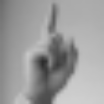

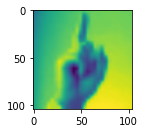

row size =  785 . Image size= 28 Label =  G


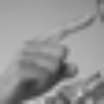

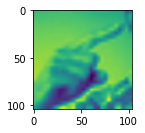

row size =  785 . Image size= 28 Label =  C


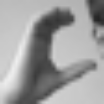

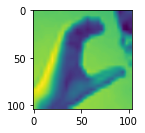

row size =  785 . Image size= 28 Label =  C


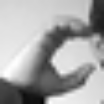

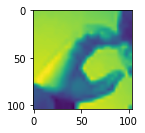

row size =  785 . Image size= 28 Label =  N


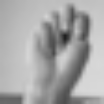

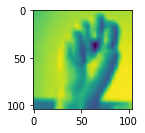

row size =  785 . Image size= 28 Label =  Q


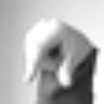

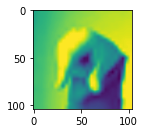

row size =  785 . Image size= 28 Label =  I


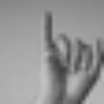

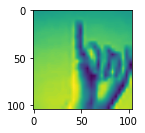

row size =  785 . Image size= 28 Label =  W


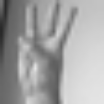

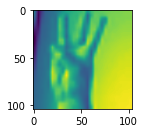

row size =  785 . Image size= 28 Label =  D


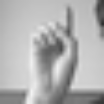

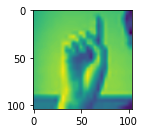

row size =  785 . Image size= 28 Label =  D


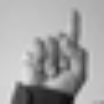

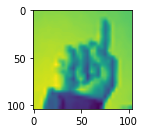

row size =  785 . Image size= 28 Label =  S


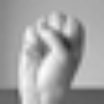

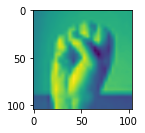

row size =  785 . Image size= 28 Label =  K


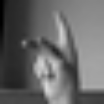

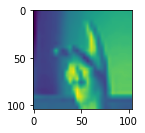

row size =  785 . Image size= 28 Label =  Q


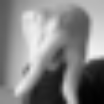

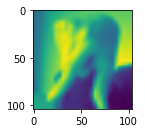

row size =  785 . Image size= 28 Label =  W


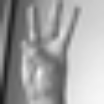

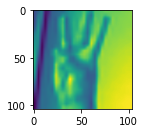

row size =  785 . Image size= 28 Label =  U


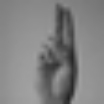

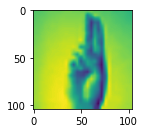

row size =  785 . Image size= 28 Label =  Q


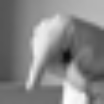

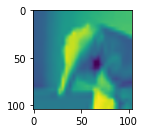

row size =  785 . Image size= 28 Label =  R


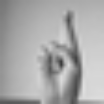

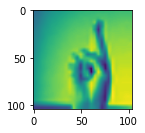

row size =  785 . Image size= 28 Label =  N


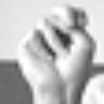

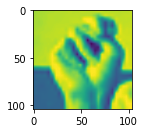

row size =  785 . Image size= 28 Label =  N


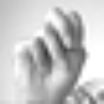

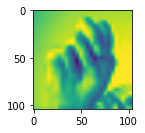

row size =  785 . Image size= 28 Label =  T


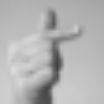

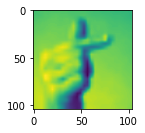

row size =  785 . Image size= 28 Label =  S


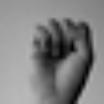

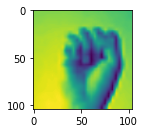

row size =  785 . Image size= 28 Label =  V


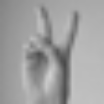

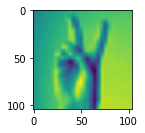

row size =  785 . Image size= 28 Label =  Q


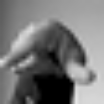

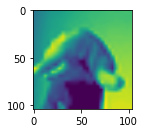

row size =  785 . Image size= 28 Label =  X


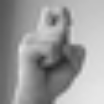

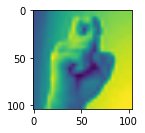

row size =  785 . Image size= 28 Label =  D


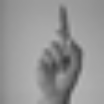

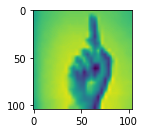

row size =  785 . Image size= 28 Label =  X


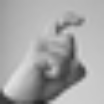

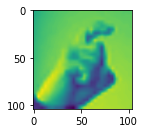

row size =  785 . Image size= 28 Label =  Y


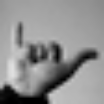

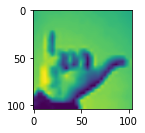

row size =  785 . Image size= 28 Label =  S


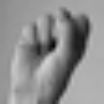

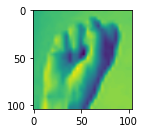

row size =  785 . Image size= 28 Label =  W


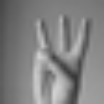

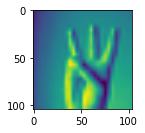

row size =  785 . Image size= 28 Label =  B


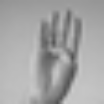

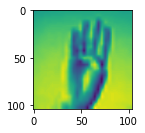

In [7]:

#for i in range(0,len(df)):
for i in range(0,30):
    npimage = np.array(df[0:][i:i+1])

    IMAGE_SIZE=int(np.sqrt(len(npimage[0]-1)-1))
    print("row size = ", IMAGE_SIZE*IMAGE_SIZE+1, ". Image size=",IMAGE_SIZE,
          "Label = ", alphabet[npimage[0][0:1][0]])
    #print(npimage)
    mat = npimage[0][1:]
    #print(mat)

    mat.resize(IMAGE_SIZE,IMAGE_SIZE)

    gen = np.array(mat ,dtype=np.uint8)
    img = cv2.resize(gen,(104,104))
    cv2_imshow(img)
    #cv2.moveWindow("hola",100,100)
    cv2.waitKey(200)
    cv2.destroyAllWindows()
    ##########################################################################
    # Display images in matplolib
    ##########################################################################
    plt.subplot(211),plt.imshow(img)
    plt.show()


##  PASO 3-2: Show some images from test dataset

row size =  785 . Image size= 28 Label =  G


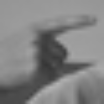

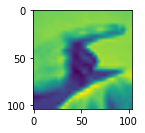

row size =  785 . Image size= 28 Label =  F


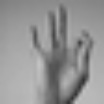

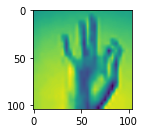

row size =  785 . Image size= 28 Label =  K


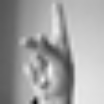

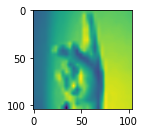

row size =  785 . Image size= 28 Label =  A


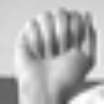

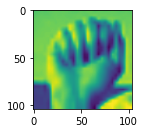

row size =  785 . Image size= 28 Label =  D


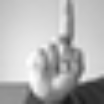

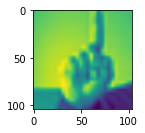

row size =  785 . Image size= 28 Label =  V


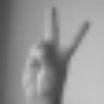

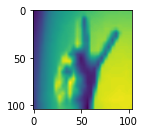

row size =  785 . Image size= 28 Label =  K


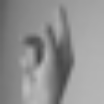

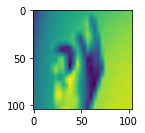

row size =  785 . Image size= 28 Label =  O


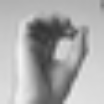

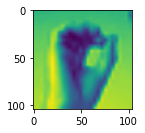

row size =  785 . Image size= 28 Label =  D


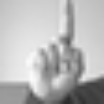

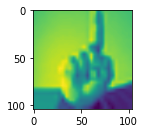

row size =  785 . Image size= 28 Label =  H


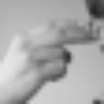

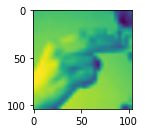

row size =  785 . Image size= 28 Label =  I


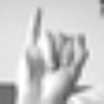

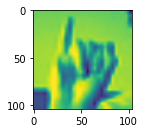

row size =  785 . Image size= 28 Label =  I


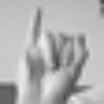

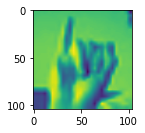

row size =  785 . Image size= 28 Label =  V


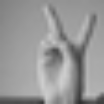

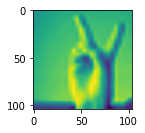

row size =  785 . Image size= 28 Label =  M


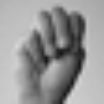

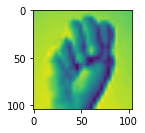

row size =  785 . Image size= 28 Label =  H


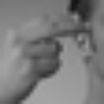

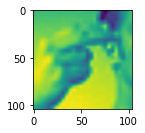

row size =  785 . Image size= 28 Label =  E


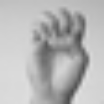

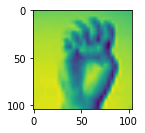

row size =  785 . Image size= 28 Label =  W


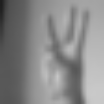

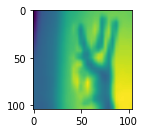

row size =  785 . Image size= 28 Label =  A


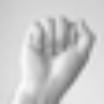

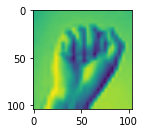

row size =  785 . Image size= 28 Label =  H


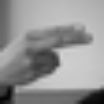

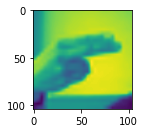

row size =  785 . Image size= 28 Label =  H


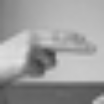

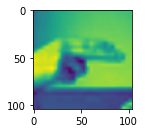

row size =  785 . Image size= 28 Label =  C


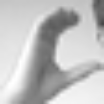

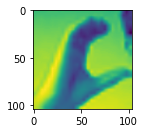

row size =  785 . Image size= 28 Label =  A


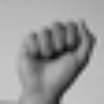

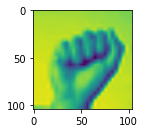

row size =  785 . Image size= 28 Label =  V


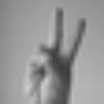

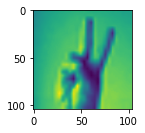

row size =  785 . Image size= 28 Label =  E


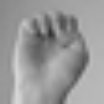

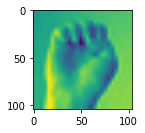

row size =  785 . Image size= 28 Label =  K


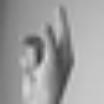

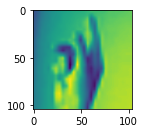

row size =  785 . Image size= 28 Label =  P


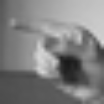

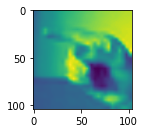

row size =  785 . Image size= 28 Label =  C


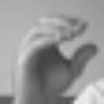

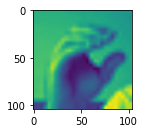

row size =  785 . Image size= 28 Label =  P


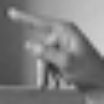

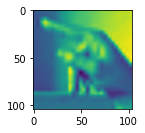

row size =  785 . Image size= 28 Label =  H


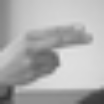

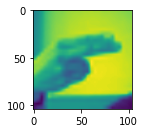

row size =  785 . Image size= 28 Label =  B


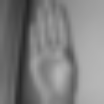

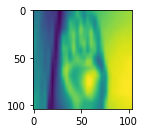

In [8]:
#for i in range(0,len(df2)):
for i in range(0,30):
    npimage = np.array(df2[0:][i:i+1])

    IMAGE_SIZE=int(np.sqrt(len(npimage[0]-1)-1))
    print("row size = ", IMAGE_SIZE*IMAGE_SIZE+1, ". Image size=",IMAGE_SIZE,
          "Label = ", alphabet[npimage[0][0:1][0]])
    #print(npimage)
    mat = npimage[0][1:]
    #print(mat)

    mat.resize(IMAGE_SIZE,IMAGE_SIZE)

    gen = np.array(mat ,dtype=np.uint8)
    img = cv2.resize(gen,(104,104))
    cv2_imshow(img)
    #cv2.moveWindow("hola",100,100)
    cv2.waitKey(200)
    cv2.destroyAllWindows()
    ##########################################################################
    # Display images in matplolib
    ##########################################################################
    plt.subplot(211),plt.imshow(img)
    plt.show()

##  STEP 4:  Prepare datasets

Training dataset is splitted into:
* Train dataset  ==> Used to train the machine learning algorithms
* Validation dataset ==> Used for machine learning algorithms to validate the efficiency of the training on every cycle/iteration of the training process.

Test dataset is used after the machine learning algorithms were trained and it represents the unknown data that a trained algorithm must classify.

In [9]:
col = df.columns.tolist()
col2 = df2.columns.tolist()
print(col)
print(df[col[0]])
print(df2[col2[0]])
X_train, X_val, y_train, y_val = train_test_split(
    df[col[1:]], df[col[0]], random_state = 0, test_size = 0.2)
X_trainEmpty, X_test, y_trainEmpty, y_test = train_test_split(
    df2[col2[1:]], df2[col2[0]], random_state = 0, test_size = 0.9)

# Scale the data to improve performance with some classifiers like MLP
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

print("\nTrain data:")
print("x train",X_train[0:5])
print("")
print("y train",y_train[0:5])

print("\nValidation data:")
print("x val",X_val[0:5])
print("")
print("y val",y_val[0:5])

print("\nTest data:")
print("x test",X_test[0:5])
print("")
print("y test",y_test[0:5])

['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91'

##  STEP 5:  Generate scatter plotters of the datasets
This provides a graphical view of how dataset looks like. This is helpful because it can provide a good hint about what are potentially the best machine learning algorithms to classify the data.

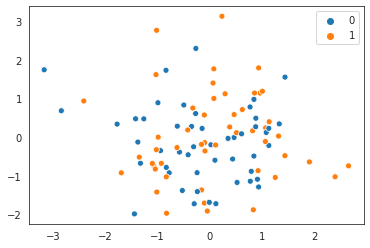

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(X, y, theta):
    m = len(y)
    #print("X",X)
    #print("theta",theta)
    #print("X @ theta",X @ theta) #multiply matrix by vector
    h = sigmoid(X @ theta)
    #print("h",h)
    epsilon = 1e-5
    
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    print("cost",cost)
    return cost

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

def predict(X, params):
    return np.round(sigmoid(X @ params))

X, y = make_classification(n_samples=100, n_features=26, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));


cost [[0.69312718]]
Initial Cost is: [[0.69312718]] 

cost [[0.68314273]]
cost [[0.67344295]]
cost [[0.66401887]]
cost [[0.65486172]]
cost [[0.64596289]]
cost [[0.63731398]]
cost [[0.62890676]]
cost [[0.62073324]]
cost [[0.61278562]]
cost [[0.60505632]]
cost [[0.59753798]]
cost [[0.59022346]]
cost [[0.58310584]]
cost [[0.57617843]]
cost [[0.56943473]]
cost [[0.56286847]]
cost [[0.55647362]]
cost [[0.5502443]]
cost [[0.54417489]]
cost [[0.53825993]]
cost [[0.53249418]]
cost [[0.52687257]]
cost [[0.52139024]]
cost [[0.51604248]]
cost [[0.51082478]]
cost [[0.50573278]]
cost [[0.50076229]]
cost [[0.49590927]]
cost [[0.49116985]]
cost [[0.48654029]]
cost [[0.48201699]]
cost [[0.4775965]]
cost [[0.4732755]]
cost [[0.46905078]]
cost [[0.46491926]]
cost [[0.46087798]]
cost [[0.45692409]]
cost [[0.45305485]]
cost [[0.44926762]]
cost [[0.44555986]]
cost [[0.44192912]]
cost [[0.43837304]]
cost [[0.43488937]]
cost [[0.43147593]]
cost [[0.4281306]]
cost [[0.42485137]]
cost [[0.42163629]]
cost [[0.4

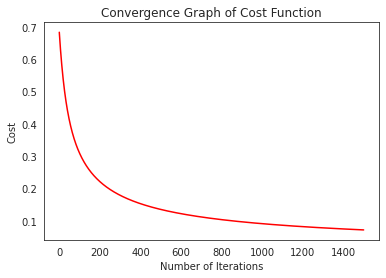

1.0


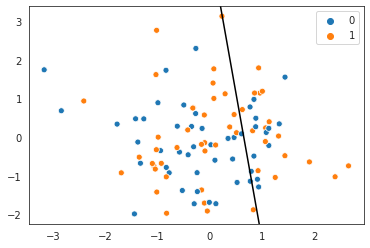

In [11]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

                   a         b         c          d
date                                               
2000-01-31  1.749870  0.261676  0.914229  -0.808406
2000-02-29  2.030151  0.184562  1.757530  -1.487278
2000-03-31  0.547987  0.061372  1.111984  -3.559760
2000-04-30 -0.815983 -0.360321  1.124658  -2.611303
2000-05-31 -0.598068 -0.580490  0.688976  -2.078007
...              ...       ...       ...        ...
2007-12-31 -2.286391  7.856596 -7.736692  -8.809681
2008-01-31 -0.748777  8.443863 -8.706270 -10.173491
2008-02-29 -1.390436  8.078931 -9.421746 -10.434283
2008-03-31 -2.578119  9.483986 -9.480374 -10.942470
2008-04-30 -4.125287  7.873569 -9.751473  -9.488922

[100 rows x 4 columns]
[[ 0.03511515  0.00789281 -0.03671425 ...  0.56563395  0.57539181
   0.58865148]
 [ 2.64622644  2.6691403   2.65904639 ... -1.94871421 -2.11519481
  -1.89987833]
 [ 0.76042384  0.76107606  0.73350307 ...  1.21398788  1.22050322
   1.22633724]
 ...
 [ 1.05054731  1.06234936  1.04159    ...  1.1823608

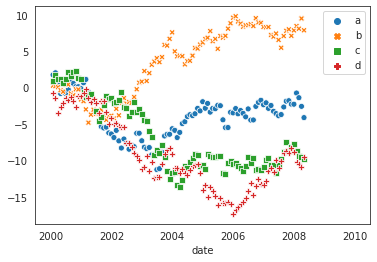

In [12]:
import numpy as np, pandas as pd; plt.close("all")

index = pd.date_range("1 1 2000", periods=100,freq="m", name="date")

data = np.random.randn(100, 4).cumsum(axis=0)

#wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d","e","f", "g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])

print(wide_df)
print(X_test)
ax = sns.scatterplot(data=wide_df)

##  STEP 6:  Instance multiple machine learning classifiers

In [13]:
classifiers = [
    {"object":ExtraTreesClassifier(),"instance":None,
     "name":"Extra Trees",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    },
    
    {"object":RandomForestClassifier(n_estimators=200,max_depth=200,
                                     random_state=0),"instance":None,
     "name":"RandomForest",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    },

#    {"object":BaggingClassifier(),"instance":None,
#     "name":"Bagging Forest",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },

    {"object":KNeighborsClassifier(3),"instance":None,
     "name":"Nearest Neighbors",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    },
    
    {"object":SVC(max_iter=20000, kernel="linear", C=0.025),
     "instance":None,
     "name":"Linear SVM",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    },
    
#    {"object":SVC(max_iter=20000, gamma=2, C=1),"instance":None,
#     "name":"RBF SVM",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },
    
#    {"object":GaussianProcessClassifier(1.0 * RBF(1.0)),
#     "instance":None,
#     "name":"Gaussian Process",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },
    
    {"object":DecisionTreeClassifier(max_depth=50),"instance":None,
     "name":"Decision Tree",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    },
    
#    {"object":MLPClassifier(alpha=1),"instance":None,
#     "name":"Neural Net",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },
    
#    {"object":AdaBoostClassifier(n_estimators=100, random_state=0),"instance":None,
#     "name":"AdaBoost",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },

#    {"object":GaussianNB(),"instance":None,
#     "name":"Naive Bayes",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },
    
#    {"object":QuadraticDiscriminantAnalysis(),"instance":None,
#     "name":"QDA",
#     "tstarttime":0,"tendtime":0,
#     "pstarttime":0,"pendtime":0,
#     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
#     "confmatriz":[], "mean":0.0, "std":0.0
#    },

    {"object":LogisticRegression(max_iter=5000,C=1e5, solver='lbfgs', 
                                 multi_class='multinomial'),
     "instance":None,
     "name":"LogisticRegression",
     "tstarttime":0,"tendtime":0,
     "pstarttime":0,"pendtime":0,
     "acstarttime":0,"acendtime":0,
#     "pretrained_file_size":0,
     "confmatriz":[], "mean":0.0, "std":0.0
    }]

In [14]:
##########################################################################
# Instance and train all classifiers
##########################################################################
for classifier in classifiers:
    print("Classifier: " + classifier["name"])
    classifier["tstarttime"] = time.time()
    print("Training starts: ",datetime.datetime.fromtimestamp(
        classifier["tstarttime"]).strftime('%Y-%m-%d %H:%M:%S'))
    
    classifier["instance"] = classifier["object"].fit(X_train, y_train)

    classifier["tendtime"] = time.time()
    print("Training stop: ",datetime.datetime.fromtimestamp(
        classifier["tendtime"]).strftime('%Y-%m-%d %H:%M:%S'))


Classifier: Extra Trees
Training starts:  2020-07-08 17:05:01
Training stop:  2020-07-08 17:05:14
Classifier: RandomForest
Training starts:  2020-07-08 17:05:14
Training stop:  2020-07-08 17:06:40
Classifier: Nearest Neighbors
Training starts:  2020-07-08 17:06:40
Training stop:  2020-07-08 17:06:42
Classifier: Linear SVM
Training starts:  2020-07-08 17:06:42
Training stop:  2020-07-08 17:07:39
Classifier: Decision Tree
Training starts:  2020-07-08 17:07:39
Training stop:  2020-07-08 17:07:56
Classifier: LogisticRegression
Training starts:  2020-07-08 17:07:56
Training stop:  2020-07-08 17:08:17


##  STEP 7:  Do Prediction for all classifiers and generate confusion matrixes

Prediccion con clasificador Extra Trees
inicio prediccion:  2020-07-08 17:08:17


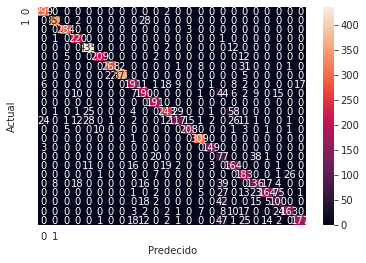

[[299   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 352   0   2   0   0   0   0   0  28   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 284   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0 220   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0]
 [  0   0   0   0 435   0   0   0   0   0   0   2   0   0   0   0   0  12
    0   0   0   0   0   0]
 [  0   0   5   0   0 209   0   0   0   0   2   0   0   0   0   0   0   0
   12   0   0   0   0   0]
 [  0   0   0   0   0   0 268   2   0   0   0   0   1   0   8   0   0   0
   31   0   0   0   1   0]
 [  0   0   0   0   0   0  22 373   0   0   0   0   0   0   0   0   0   0
    5   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0 191   1   1  18   9   0   0   1   0   8
    2   0   0   0   0  17]
 [  0   0   0  10   0   0   0   0   7 190   0   0   0   0   1   0  44   6
    2   9   0  15

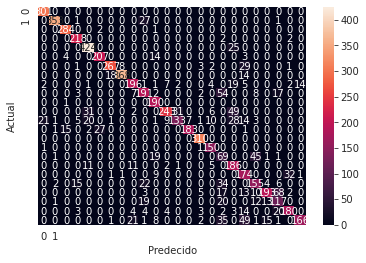

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 353   0   1   0   0   0   0   0  27   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  0   0 284   0   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   2   0]
 [  0   0   0   0 424   0   0   0   0   0   0   0   0   0   0   0   0  25
    0   0   0   0   0   0]
 [  0   0   4   0   0 207   0   0   0   0  14   0   0   0   0   0   0   0
    3   0   0   0   0   0]
 [  0   0   0   1   0   0 267   8   0   0   0   0   0   0   3   2   0   0
   29   0   0   0   1   0]
 [  0   0   0   0   0   0  18 368   0   0   0   0   0   0   0   0   0   0
   14   0   0   0   0   0]
 [  2   0   0   0   1   0   0   0 196   1   1   7   2   0   0   4   0  19
    5   0   0   0   2  14]
 [  0   0   0   3   0   0   0   0   7 191   2   0   0   0   2   0  54   0
    0   8   0  17

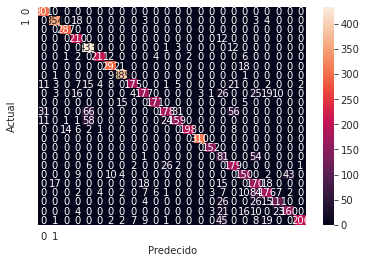

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 354   0  18   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   3   4   0   0   0]
 [  0   0 287   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 210   0   0   0   0   0   0   0   0   0   0   0   0  12   0
    0   0   0   0   0   0]
 [  0   0   0   0 433   0   0   0   0   0   0   1   3   0   0   0   0  12
    0   0   0   0   0   0]
 [  0   0   1   2   0 211   2   0   0   0   4   0   0   2   0   0   0   0
    6   0   0   0   0   0]
 [  0   0   0   0   0   0 292   1   0   0   0   0   0   0   0   0   0   0
   18   0   0   0   0   0]
 [  0   1   0   0   0   0   9 389   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [ 11   3   0   7  15   4   8   0 175   0   0   1   5   0   0   0   0  21
    0   0   2   0   0   2]
 [  0   3   0  16   0   0   0   0   4 177   0   0   0   0   3   1  26   0
    0  25  19  10

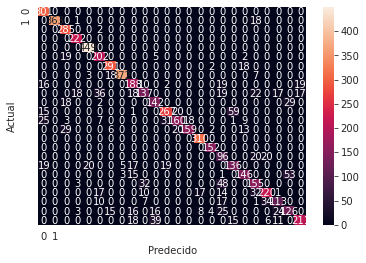

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 363   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  18   0   0   0   0]
 [  0   0 285   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 222   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 449   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  19   0   0 202   0   0   0   0   5   0   0   0   0   0   0   0
    2   0   0   0   0   0]
 [  0   0   0   0   0   0 291   0   0   0   0   0   0   0   0   2   0   0
   18   0   0   0   0   0]
 [  0   0   0   0   3   0  18 372   0   0   0   0   0   0   0   0   0   0
    0   7   0   0   0   0]
 [ 16   0   0   0   0   0   0   0 188  10   0   2   0   0   0   0  19   0
    0   0   0   0   0  19]
 [  0   0   0  18   0  36   0   0  18 137   0   0   0   0   0   0  19   0
    0  22   0  17

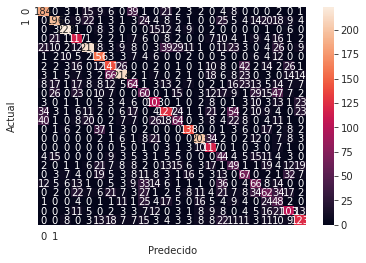

[[184   0   3   1  15   9   6   0  39   1   0  21   2   3   2   0   4   8
    0   0   0   2   0   1]
 [  0 196   6   9  22   1   3   1   3  24   4   8   5   1   0   0  25   5
    4  14  20  18   9   4]
 [  0   3 223   1   0   8   3   0   0   0  15  12   4   9   0   2   0   0
    0   0   1   0   6   0]
 [  0  21   1 117   1   2   2   1   7   6   0   8   2   0   0   7  10   4
    1   9   4  16   1   2]
 [ 21  10   2  12 217   8   3   9   8   0   3  39  29  11   1   0  11  23
    3   0   4  26   0   9]
 [  1   2  10   5   2 156   3   3   7   4   6   0   0   2   0   0   5   0
    0   6   4  12   0   0]
 [  2   2   3  16   0  12 141  26   0   0   2   0   1   0   1  10   8   0
   42   2  14   2  26   1]
 [  3   1   5   7   3   2  66 214   2   1   7   0   2   1   0  18   6   8
   23   0   3   0  14  14]
 [  8  17   1  17   8   8  12   5  64   1   3  13   2   7   0   2   1  16
   23  13   5  14   7   7]
 [  0  26   0  23   0  10   7   0   0  60   0   1  15   0   3  12  17   9
    1  29  15  47

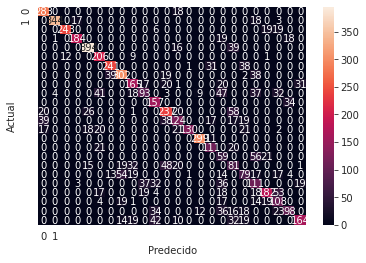

[[283   0   0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 344   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  18   0   3   0   0]
 [  0   0 243   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0
    0   0  19  19   0   0]
 [  0   1   0 184   0   0   0   0   0   0   0   0   0   0   0   0  19   0
    0   0   0   0  18   0]
 [  0   0   0   0 394   0   0   0   0   0   0   0  16   0   0   0   0  39
    0   0   0   0   0   0]
 [  0   0  12   0   0 206   0   0   9   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0]
 [  0   0   0   0   0   0 241   0   0   0   0   0   0   1   0  31   0   0
   38   0   0   0   0   0]
 [  0   0   0   0   0   0  39 302   0   0   0  19   0   0   0   0   0   0
    2  38   0   0   0   0]
 [  0   0   0   0   0   0   0   0 165  17   0  20   1   0   0   0  20   0
    0   0   0   0   0  31]
 [  0   4   0   0   0  41   0   0  18  93   0   3   0   0   9   0  47   0
    0  37   0  32

In [15]:
########################################################################
# Do prediction for all classifiers
########################################################################
for classifier in classifiers:
    print("Prediccion con clasificador " + classifier["name"])
    classifier["pstarttime"] = time.time()
    print("inicio prediccion: ",datetime.datetime.fromtimestamp(
        classifier["pstarttime"]).strftime('%Y-%m-%d %H:%M:%S'))
    
    y_pred = classifier["instance"].predict(X_test)
    #print(y_pred)
    classifier["confmatriz"] = confusion_matrix(y_test, y_pred)
    sns.heatmap(classifier["confmatriz"], annot=True, fmt='d',
                xticklabels='01', yticklabels='01')
    classifier["pendtime"] = time.time()
    plt.ylabel('Actual')
    plt.xlabel('Predecido')
    plt.show()
    print(classifier["confmatriz"])
    print("fin prediccion: ",datetime.datetime.fromtimestamp(
        classifier["pendtime"]).strftime('%Y-%m-%d %H:%M:%S'))

##  STEP 8:  Calculate Machine learning accuracy

In [16]:

for classifier in classifiers:
    print("Accuracy: " + classifier["name"])
    classifier["acstarttime"] = time.time()
    print("Accuracy calculation starts: ",datetime.datetime.fromtimestamp(
        classifier["acstarttime"]).strftime('%Y-%m-%d %H:%M:%S'))

    kfold = model_selection.KFold(n_splits=10, random_state=7)
#    cv_results = model_selection.cross_val_score(
#        classifier["instance"], X_val, y_val, cv=kfold, 
#        scoring='accuracy')
    cv_results = model_selection.cross_val_score(
        classifier["instance"], X_test, y_test, cv=kfold,
        scoring='accuracy')
    accurancy_msg = "%s: mean(%f) std(%f)" % (
        classifier["name"], cv_results.mean(),cv_results.std())
    classifier["mean"] = cv_results.mean()
    classifier["std"] = cv_results.std()

    print(accurancy_msg)

    classifier["acendtime"] = time.time()
    print("Accuracy calculation stops: ",
          datetime.datetime.fromtimestamp(
        classifier["acendtime"]).strftime('%Y-%m-%d %H:%M:%S'))


Accuracy: Extra Trees
Accuracy calculation starts:  2020-07-08 17:12:04


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Extra Trees: mean(0.998140) std(0.001669)
Accuracy calculation stops:  2020-07-08 17:12:31
Accuracy: RandomForest
Accuracy calculation starts:  2020-07-08 17:12:31


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForest: mean(0.996591) std(0.002667)
Accuracy calculation stops:  2020-07-08 17:15:53
Accuracy: Nearest Neighbors
Accuracy calculation starts:  2020-07-08 17:15:53


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Nearest Neighbors: mean(0.996901) std(0.002079)
Accuracy calculation stops:  2020-07-08 17:16:24
Accuracy: Linear SVM
Accuracy calculation starts:  2020-07-08 17:16:24


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Linear SVM: mean(1.000000) std(0.000000)
Accuracy calculation stops:  2020-07-08 17:17:40
Accuracy: Decision Tree
Accuracy calculation starts:  2020-07-08 17:17:40


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree: mean(0.895259) std(0.011471)
Accuracy calculation stops:  2020-07-08 17:18:17
Accuracy: LogisticRegression
Accuracy calculation starts:  2020-07-08 17:18:17


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression: mean(1.000000) std(0.000000)
Accuracy calculation stops:  2020-07-08 17:18:35


##  STEP 8-1:  Save trained models

In [17]:
import pickle
for classifier in classifiers:
    f = open(classifier["name"] + ".sav","wb")
    pickle.dump(classifier["instance"], f)

!ls *.sav

'Decision Tree.sav'  'Linear SVM.sav'	      'Nearest Neighbors.sav'
'Extra Trees.sav'     LogisticRegression.sav   RandomForest.sav


In [18]:
import re
files = !ls -l *.sav

sizedict = {}

for f in files:
    f = ' '.join(f.split())
    #print(f)
    tokens = f.split(" ")
    fsize = tokens[4]
    mname = tokens[8]
    if f.find("'") > -1:
      mname = f.split("'")[1]

    mname = mname.replace(".sav","")
    print(" model="+mname+ " filesize="+fsize)
    sizedict[mname] = fsize

for classifier in classifiers:
    classifier["pretrained_file_size"] = sizedict[classifier["name"]]
    print(classifier["name"],classifier["pretrained_file_size"])


 model=Decision Tree filesize=1089454
 model=Extra Trees filesize=202128803
 model=Linear SVM filesize=17797067
 model=LogisticRegression filesize=151735
 model=Nearest Neighbors filesize=288734668
 model=RandomForest filesize=233853859
Extra Trees 202128803
RandomForest 233853859
Nearest Neighbors 288734668
Linear SVM 17797067
Decision Tree 1089454
LogisticRegression 151735


# STEP 8-2: Store trained models back into Google Drive

In [25]:
!ls *.png
!mkdir "$WORK_PATH/graphics"
!mkdir "$WORK_PATH/models"
!cp *.png "$WORK_PATH/graphics"
!ls *.sav
!cp *.sav "$WORK_PATH/models"

accuracy.png		     correctPredictions.png  PredictionTime.png
AcurracyCalculationTime.png  ModelSize.png	     TrainingTime.png
'Decision Tree.sav'  'Linear SVM.sav'	      'Nearest Neighbors.sav'
'Extra Trees.sav'     LogisticRegression.sav   RandomForest.sav


##  STEP 9:  Plot results

In [26]:
# Short cut classifier's names
#for classifier in classifiers:
#    classifier["name"] = classifier["name"][:3]


In [27]:
# Add label to axes
def autolabel(rects, multiplier):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        if multiplier == 0:
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                    '%0.2f' % height,
                    ha='center', va='bottom')
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                    '%d' % int(height*multiplier),
                    ha='center', va='bottom')

# STEP 9-1: Plot accuracy, correct predictions and model size

['Extra Trees', 'RandomForest', 'Nearest Neighbors', 'Linear SVM', 'Decision Tree', 'LogisticRegression']
[0.9981404948760411, 0.9965905872753018, 0.9969009047927617, 1.0, 0.8952590779273765, 1.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if sys.path[0] == '':


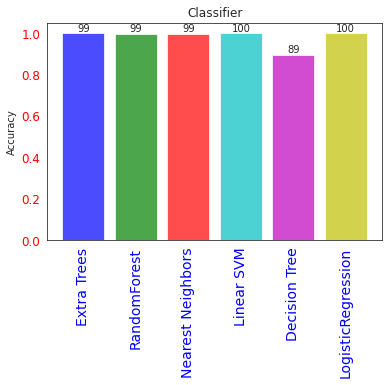

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


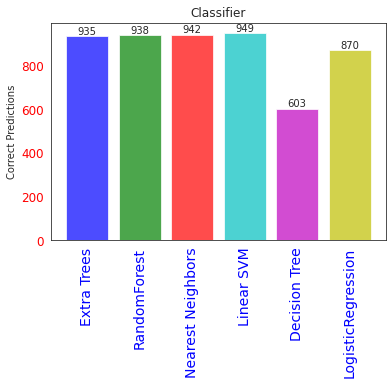

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


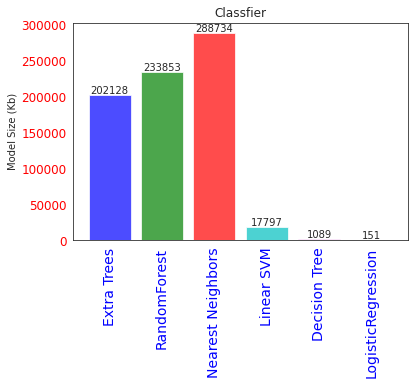

In [28]:
objects = []
performance = []

for classifier in classifiers:
    objects.append(classifier["name"])
    performance.append(classifier["mean"])

print(str(objects))
print(str(performance))

y_pos = np.arange(len(objects))
plt.bar(y_pos, performance, align='center', alpha=0.7, color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=0)
plt.ylabel('Accuracy')
plt.title('Classifier')
ax = plt.gca()
autolabel(ax.patches,100)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('accuracy.png')
plt.show()

recognitions_ok = []
for classifier in classifiers:
    confmatrix = classifier["confmatriz"]
    ok_number = confmatrix[0][0] + confmatrix[1][1]  + confmatrix[2][2] 
    + confmatrix[3][3]
    recognitions_ok.append(ok_number)
    
plt.bar(y_pos, recognitions_ok, align='center', alpha=0.7,
        color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=0)
plt.ylabel('Correct Predictions')
plt.title('Classifier')
ax = plt.gca()
autolabel(ax.patches,1)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('correctPredictions.png')
plt.show()

filessize = []
for classifier in classifiers:
    filessize.append(int(classifier["pretrained_file_size"])/1000)
    
plt.bar(y_pos, filessize, align='center', alpha=0.7,
        color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=0)
plt.ylabel('Model Size (Kb)')
plt.title('Classfier')
ax = plt.gca()
autolabel(ax.patches,1)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('ModelSize.png')
plt.show()



# STEP 9-2: Plot training time, Prediction time and Accuracy calculation time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


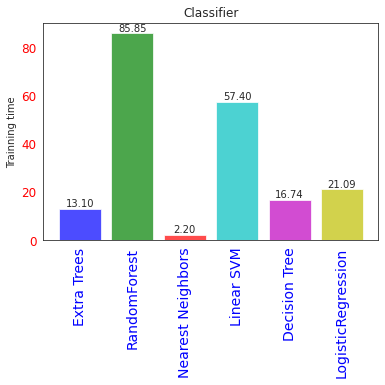

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


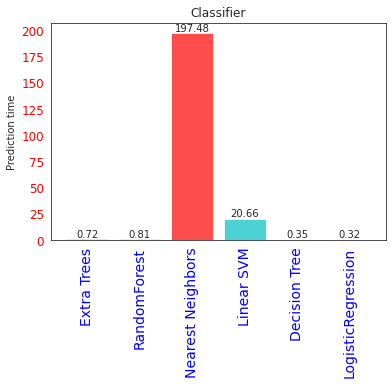

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


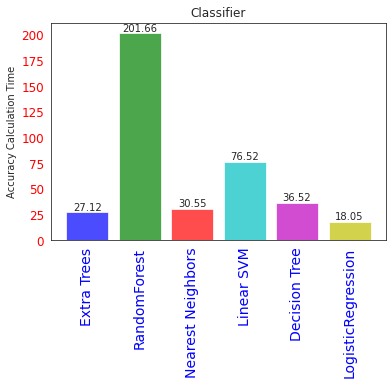

In [29]:
y_pos = np.arange(len(objects))

performance = []
for classifier in classifiers:
    performance.append(classifier["tendtime"] -
                       classifier["tstarttime"])

plt.bar(y_pos, performance, align='center', alpha=0.7, 
        color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Trainning time')
plt.title('Classifier')
ax = plt.gca()
autolabel(ax.patches,0)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('./TrainingTime.png')
plt.show()


performance = []
for classifier in classifiers:
    performance.append(classifier["pendtime"] -
                       classifier["pstarttime"])

plt.bar(y_pos, performance, align='center', alpha=0.7,
        color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=0)
plt.ylabel('Prediction time')
plt.title('Classifier')
ax = plt.gca()
autolabel(ax.patches,0)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('./PredictionTime.png')
plt.show()

performance = []
for classifier in classifiers:
    performance.append(classifier["acendtime"] - 
                       classifier["acstarttime"])

plt.bar(y_pos, performance, align='center', alpha=0.7, color='bgrcmyk')
plt.xticks(y_pos, objects, rotation=90)
#plt.xticks(y_pos, objects, rotation=0)
plt.ylabel('Accuracy Calculation Time')
plt.title('Classifier')
ax = plt.gca()
autolabel(ax.patches,0)
ax.tick_params(axis='x', colors='blue',labelsize=14)
ax.tick_params(axis='y', colors='red',labelsize=12)
plt.savefig('./AcurracyCalculationTime.png')
plt.show()

# STEP 10: Load saved models

In [30]:
models_path = WORK_PATH+ "/models/"
files = os.listdir(models_path)

files.sort()
print(files)

models = []

for f in files:
    print("Cargando modelo "+ models_path+f)
    fmodel = open(models_path+f,"rb")
    modelo = pickle.load(fmodel)
    try:
        fdir = f.split("/")
        fname = fdir[len(fdir)-1].split(".")[0]
        print("Nombre del modelo = '" + fname + "'")
        models.append([fname,modelo])
        print("modelo cargado exitosamente")
    except:
      print("***ERROR: No se pudo cargar modelo '" + f + "'****\n")
print(models)

['Decision Tree.sav', 'Extra Trees.sav', 'Linear SVM.sav', 'LogisticRegression.sav', 'Nearest Neighbors.sav', 'RandomForest.sav']
Cargando modelo /content/drive/My Drive/Dactilology/models/Decision Tree.sav
Nombre del modelo = 'Decision Tree'
modelo cargado exitosamente
Cargando modelo /content/drive/My Drive/Dactilology/models/Extra Trees.sav
Nombre del modelo = 'Extra Trees'
modelo cargado exitosamente
Cargando modelo /content/drive/My Drive/Dactilology/models/Linear SVM.sav
Nombre del modelo = 'Linear SVM'
modelo cargado exitosamente
Cargando modelo /content/drive/My Drive/Dactilology/models/LogisticRegression.sav
Nombre del modelo = 'LogisticRegression'
modelo cargado exitosamente
Cargando modelo /content/drive/My Drive/Dactilology/models/Nearest Neighbors.sav
Nombre del modelo = 'Nearest Neighbors'
modelo cargado exitosamente
Cargando modelo /content/drive/My Drive/Dactilology/models/RandomForest.sav
Nombre del modelo = 'RandomForest'
modelo cargado exitosamente
[['Decision Tree',

# STEP 11: Do prediction again

Prediccion con clasificador Decision Tree


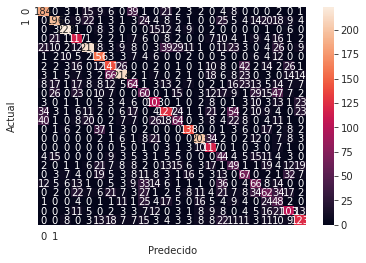

[[184   0   3   1  15   9   6   0  39   1   0  21   2   3   2   0   4   8
    0   0   0   2   0   1]
 [  0 196   6   9  22   1   3   1   3  24   4   8   5   1   0   0  25   5
    4  14  20  18   9   4]
 [  0   3 223   1   0   8   3   0   0   0  15  12   4   9   0   2   0   0
    0   0   1   0   6   0]
 [  0  21   1 117   1   2   2   1   7   6   0   8   2   0   0   7  10   4
    1   9   4  16   1   2]
 [ 21  10   2  12 217   8   3   9   8   0   3  39  29  11   1   0  11  23
    3   0   4  26   0   9]
 [  1   2  10   5   2 156   3   3   7   4   6   0   0   2   0   0   5   0
    0   6   4  12   0   0]
 [  2   2   3  16   0  12 141  26   0   0   2   0   1   0   1  10   8   0
   42   2  14   2  26   1]
 [  3   1   5   7   3   2  66 214   2   1   7   0   2   1   0  18   6   8
   23   0   3   0  14  14]
 [  8  17   1  17   8   8  12   5  64   1   3  13   2   7   0   2   1  16
   23  13   5  14   7   7]
 [  0  26   0  23   0  10   7   0   0  60   0   1  15   0   3  12  17   9
    1  29  15  47

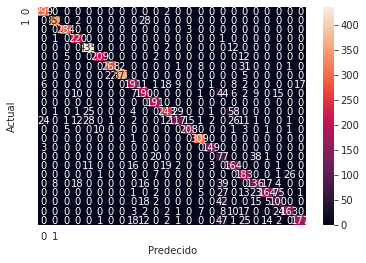

[[299   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 352   0   2   0   0   0   0   0  28   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 284   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0 220   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0]
 [  0   0   0   0 435   0   0   0   0   0   0   2   0   0   0   0   0  12
    0   0   0   0   0   0]
 [  0   0   5   0   0 209   0   0   0   0   2   0   0   0   0   0   0   0
   12   0   0   0   0   0]
 [  0   0   0   0   0   0 268   2   0   0   0   0   1   0   8   0   0   0
   31   0   0   0   1   0]
 [  0   0   0   0   0   0  22 373   0   0   0   0   0   0   0   0   0   0
    5   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0 191   1   1  18   9   0   0   1   0   8
    2   0   0   0   0  17]
 [  0   0   0  10   0   0   0   0   7 190   0   0   0   0   1   0  44   6
    2   9   0  15

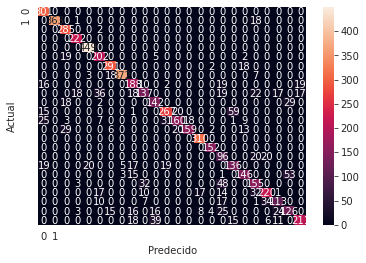

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 363   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  18   0   0   0   0]
 [  0   0 285   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 222   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 449   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  19   0   0 202   0   0   0   0   5   0   0   0   0   0   0   0
    2   0   0   0   0   0]
 [  0   0   0   0   0   0 291   0   0   0   0   0   0   0   0   2   0   0
   18   0   0   0   0   0]
 [  0   0   0   0   3   0  18 372   0   0   0   0   0   0   0   0   0   0
    0   7   0   0   0   0]
 [ 16   0   0   0   0   0   0   0 188  10   0   2   0   0   0   0  19   0
    0   0   0   0   0  19]
 [  0   0   0  18   0  36   0   0  18 137   0   0   0   0   0   0  19   0
    0  22   0  17

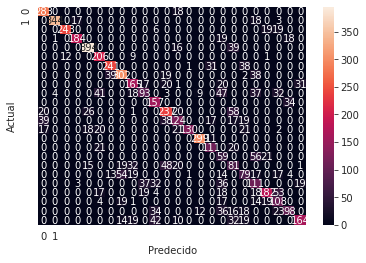

[[283   0   0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 344   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  18   0   3   0   0]
 [  0   0 243   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0
    0   0  19  19   0   0]
 [  0   1   0 184   0   0   0   0   0   0   0   0   0   0   0   0  19   0
    0   0   0   0  18   0]
 [  0   0   0   0 394   0   0   0   0   0   0   0  16   0   0   0   0  39
    0   0   0   0   0   0]
 [  0   0  12   0   0 206   0   0   9   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0]
 [  0   0   0   0   0   0 241   0   0   0   0   0   0   1   0  31   0   0
   38   0   0   0   0   0]
 [  0   0   0   0   0   0  39 302   0   0   0  19   0   0   0   0   0   0
    2  38   0   0   0   0]
 [  0   0   0   0   0   0   0   0 165  17   0  20   1   0   0   0  20   0
    0   0   0   0   0  31]
 [  0   4   0   0   0  41   0   0  18  93   0   3   0   0   9   0  47   0
    0  37   0  32

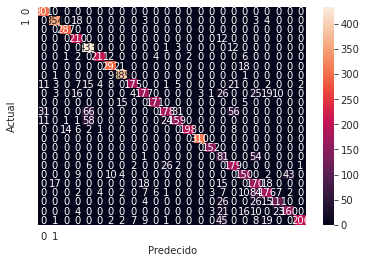

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 354   0  18   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   3   4   0   0   0]
 [  0   0 287   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 210   0   0   0   0   0   0   0   0   0   0   0   0  12   0
    0   0   0   0   0   0]
 [  0   0   0   0 433   0   0   0   0   0   0   1   3   0   0   0   0  12
    0   0   0   0   0   0]
 [  0   0   1   2   0 211   2   0   0   0   4   0   0   2   0   0   0   0
    6   0   0   0   0   0]
 [  0   0   0   0   0   0 292   1   0   0   0   0   0   0   0   0   0   0
   18   0   0   0   0   0]
 [  0   1   0   0   0   0   9 389   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [ 11   3   0   7  15   4   8   0 175   0   0   1   5   0   0   0   0  21
    0   0   2   0   0   2]
 [  0   3   0  16   0   0   0   0   4 177   0   0   0   0   3   1  26   0
    0  25  19  10

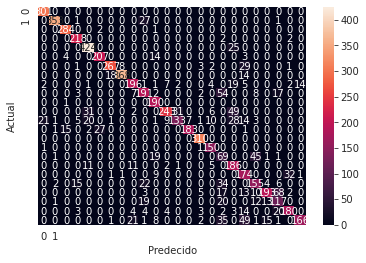

[[301   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 353   0   1   0   0   0   0   0  27   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  0   0 284   0   0   2   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 218   0   0   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   2   0]
 [  0   0   0   0 424   0   0   0   0   0   0   0   0   0   0   0   0  25
    0   0   0   0   0   0]
 [  0   0   4   0   0 207   0   0   0   0  14   0   0   0   0   0   0   0
    3   0   0   0   0   0]
 [  0   0   0   1   0   0 267   8   0   0   0   0   0   0   3   2   0   0
   29   0   0   0   1   0]
 [  0   0   0   0   0   0  18 368   0   0   0   0   0   0   0   0   0   0
   14   0   0   0   0   0]
 [  2   0   0   0   1   0   0   0 196   1   1   7   2   0   0   4   0  19
    5   0   0   0   2  14]
 [  0   0   0   3   0   0   0   0   7 191   2   0   0   0   2   0  54   0
    0   8   0  17

In [31]:
#print(models)
for model in models:
    print("Prediccion con clasificador " + model[0])
    
    y_pred = model[1].predict(X_test)
    #print(y_pred)
    confmatriz = confusion_matrix(y_test, y_pred)
    sns.heatmap(confmatriz, annot=True, fmt='d',
                xticklabels='01', yticklabels='01')
    plt.ylabel('Actual')
    plt.xlabel('Predecido')
    plt.show()
    print(confmatriz)